# Le Titanic Kaggle Challenge

## Checklist de base
### Analyse de forme
- variable target : Survived
- lignes et colonnes : 891, 12
- types de variables :
    - int : 5, float : 2, object : 5
    - 2 variables quantitative et 10 variables qualitatives
- Analyse des valeurs manquantes : peu de NaN.
    - Beaucoup de NaN en cabin : 687 (77%)
    - Age : 177 (20%)
    - Embarked : 2
### Analyse de fond
- Visualisation de la target :
    - 38% de survivant.
    - Peu de corrélation entre les différentes colonne (sex/survie et (sibsp/parch)
- Signification des variables :
- Relation Variables / Target :

### Analyse plus détaillée
- Analyse des relations directs entre nos différentes variables
    - Relation Variable/Variable :
    - Nan analyse : 
### Hypothèses nulle (H0)



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [4]:

def encodage(df):
    encoder = OrdinalEncoder()
    df_encoded = df.copy()
    categorical_cols = df.select_dtypes(include=['object', "category"]).columns
    df_encoded[categorical_cols] = encoder.fit_transform(df[categorical_cols])
    return df_encoded


def normalize_columns(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

In [5]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)
data = pd.read_csv("train_titanic.csv")

In [6]:
df = data.copy()

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [9]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

<Axes: >

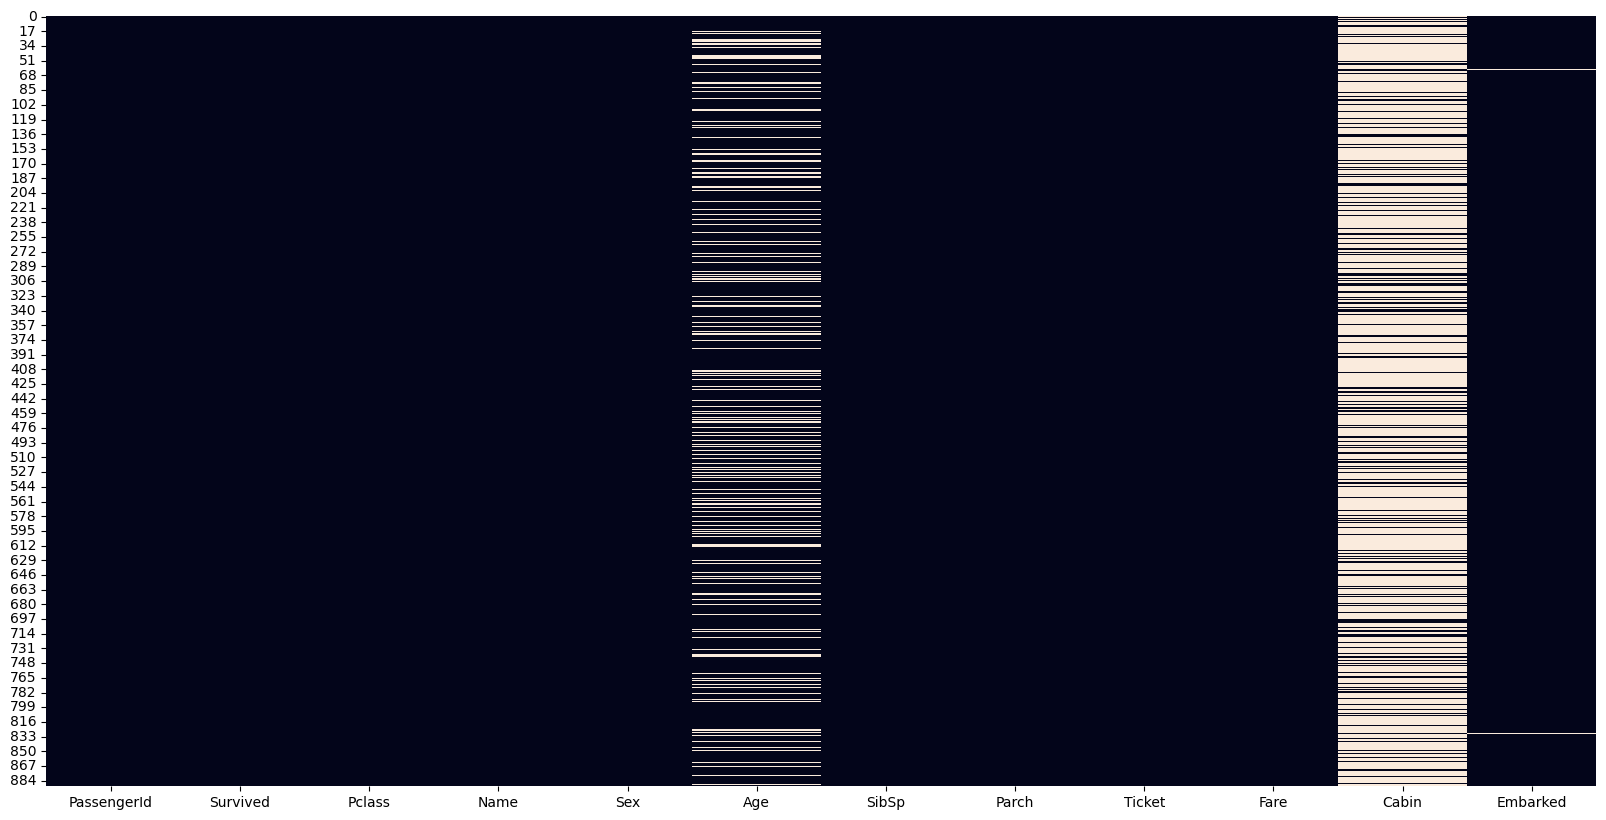

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [11]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

In [12]:
df = df.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis=1)

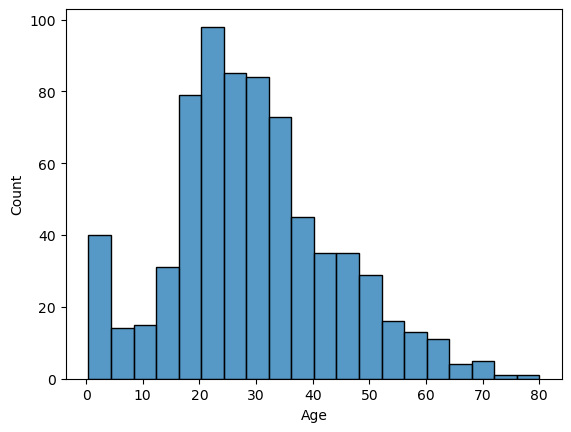

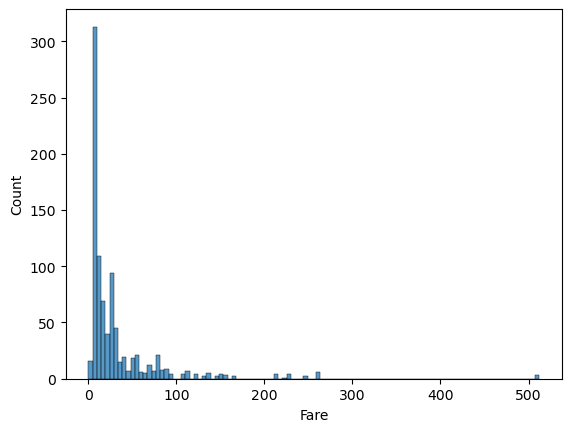

In [13]:
for col in df.select_dtypes("float"):
    plt.figure()
    sns.histplot(df[col])

In [14]:
df.groupby('Sex')["Survived"].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

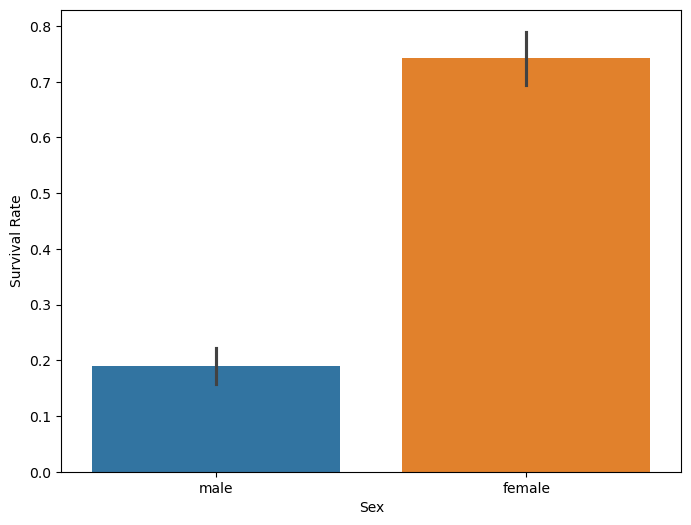

In [15]:

plt.figure(figsize=(8, 6))
sns.barplot(x="Sex", y="Survived", data=df, hue="Sex")
plt.ylabel('Survival Rate')
plt.show()

In [16]:
df.groupby('Pclass')["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

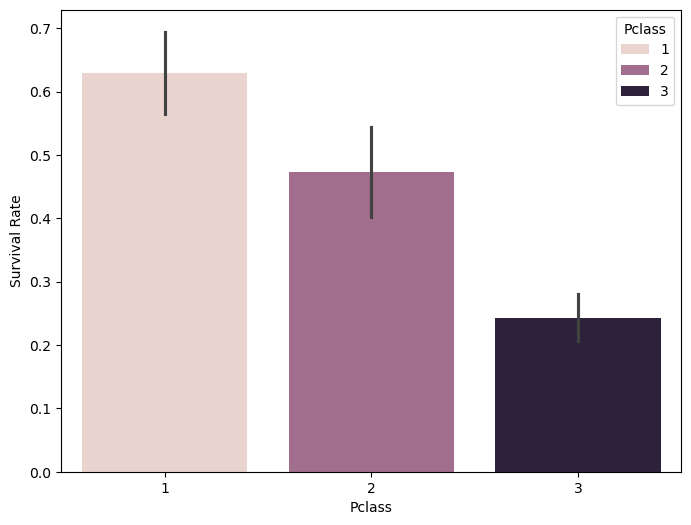

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Pclass", y="Survived", data=df, hue="Pclass")
plt.ylabel('Survival Rate')
plt.show()

In [18]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 5, 18, 30, 60, 100], 
                           labels=['0-5', '5-18', '18-30', '30-60', '60+'])

In [19]:
df["AgeGroup"].value_counts()/891*100

AgeGroup
30-60    31.762065
18-30    30.303030
5-18     10.662177
0-5       4.938272
60+       2.469136
Name: count, dtype: float64

In [20]:
df.groupby("AgeGroup")["Survived"].mean()

C:\Users\John\AppData\Local\Temp\ipykernel_1536\2602041343.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AgeGroup")["Survived"].mean()


AgeGroup
0-5      0.704545
5-18     0.410526
18-30    0.355556
30-60    0.420495
60+      0.227273
Name: Survived, dtype: float64

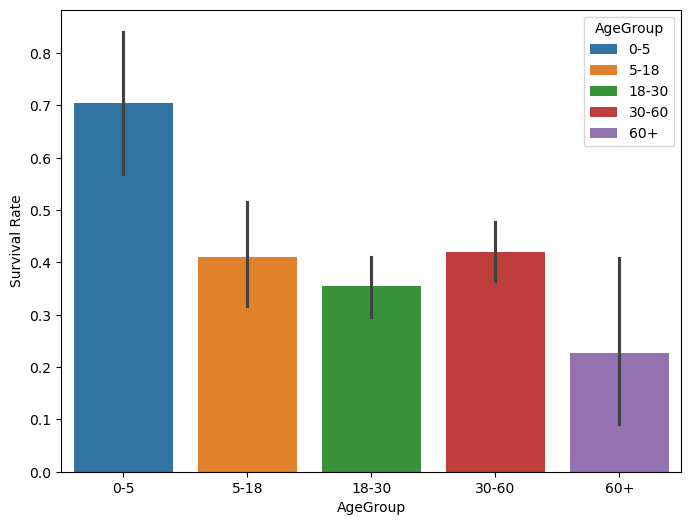

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x="AgeGroup", y="Survived", data=df, hue="AgeGroup")
plt.ylabel("Survival Rate")
plt.show()

In [22]:
df["FareGroup"] = pd.cut(df["Fare"], bins=[0, 10, 50, 100, 300, 1000],
                        labels=["0-10", "10-50", "50-100", "100-300", "300+"],
                        right=False)

In [23]:
df["FareGroup"].value_counts()

FareGroup
10-50      394
0-10       336
50-100     108
100-300     50
300+         3
Name: count, dtype: int64

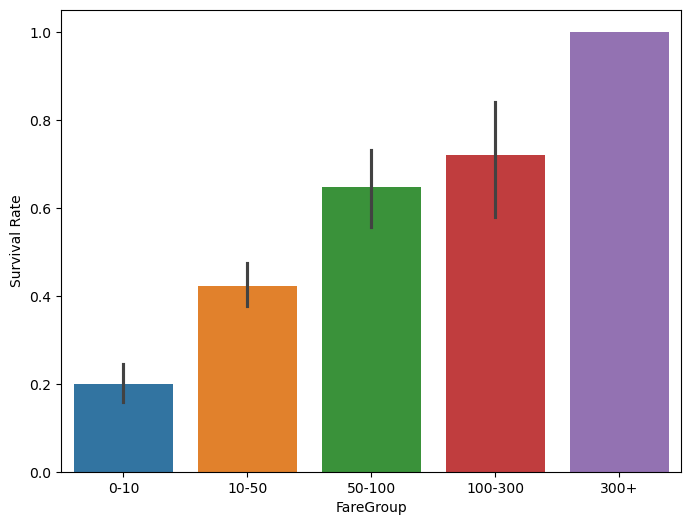

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x="FareGroup", y="Survived", data=df, hue="FareGroup")
plt.ylabel("Survival Rate")
plt.show()

In [25]:
df["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [26]:
df.groupby("Parch")["Survived"].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

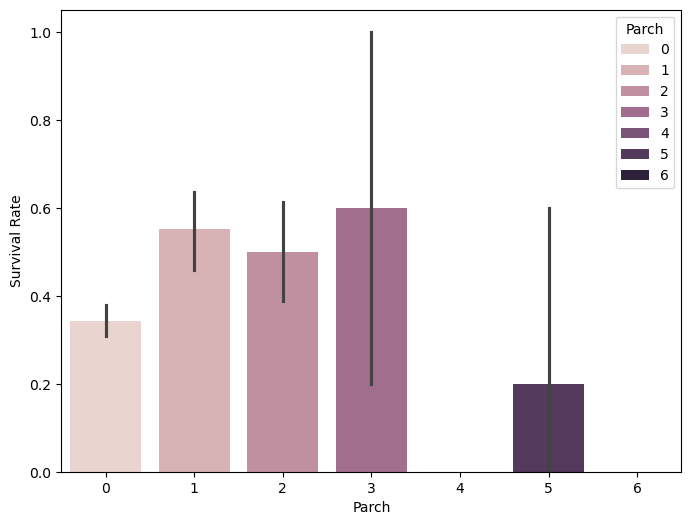

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Parch", y="Survived", data=df, hue="Parch")
plt.ylabel("Survival Rate")
plt.show()

In [28]:
df["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [29]:
df.groupby("SibSp")["Survived"].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

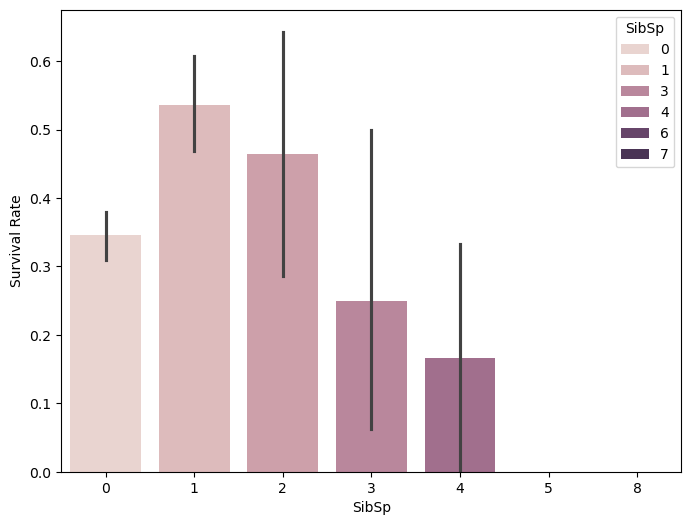

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(x="SibSp", y="Survived", data=df, hue="SibSp")
plt.ylabel("Survival Rate")
plt.show()

In [31]:
df["Family"] = df["Parch"] + df["SibSp"]
df.groupby("Family")["Survived"].mean()

Family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

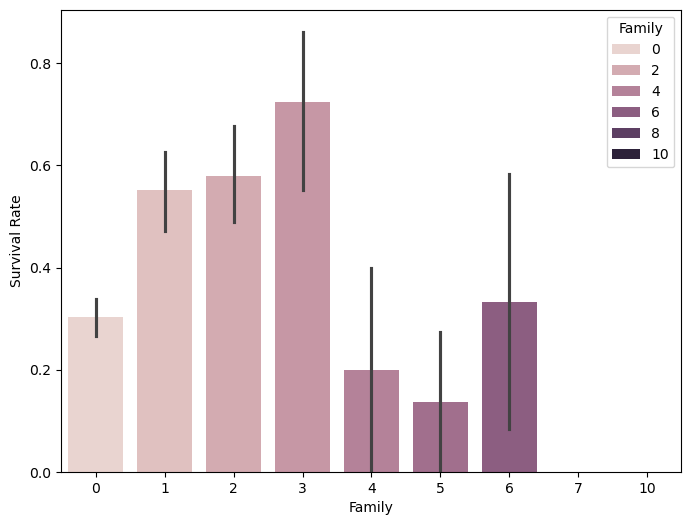

In [32]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Family", y="Survived", data=df, hue="Family")
plt.ylabel("Survival Rate")
plt.show()

In [33]:
df.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

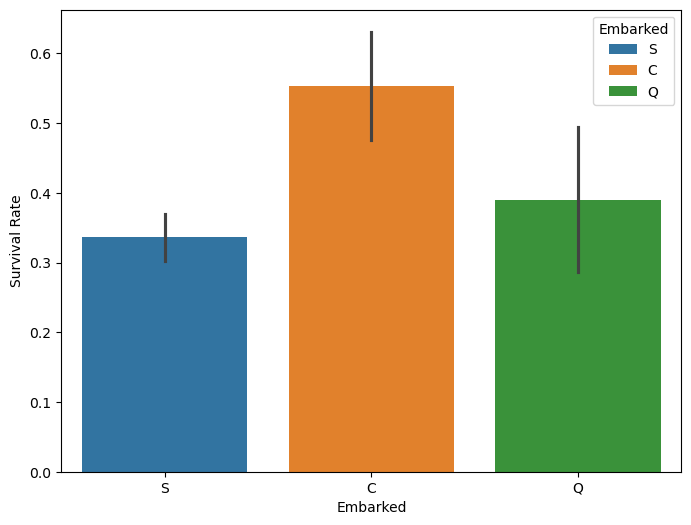

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Embarked", y="Survived", data=df, hue="Embarked")
plt.ylabel("Survival Rate")
plt.show()